# Logistic Regression as a Single Neuron Model

## Imports

In [2]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions (Just run this cell - no need to go through the code in helper functions)

In [3]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File downloaded: train_catvnoncat.h5
File downloaded: test_catvnoncat.h5


## Data Visualization

label:  [1]


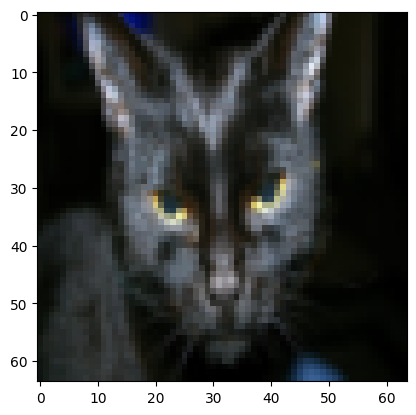

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in train/test set. Try to see both cat and non-cat samples.

label:  [0]


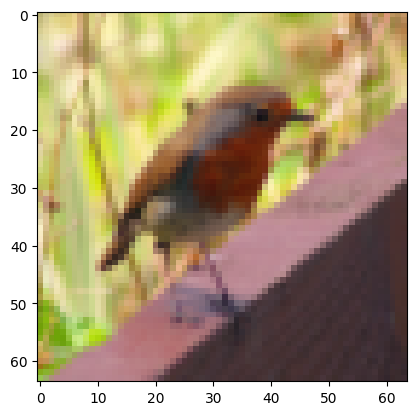

In [27]:
#your code here
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])


label:  [1]


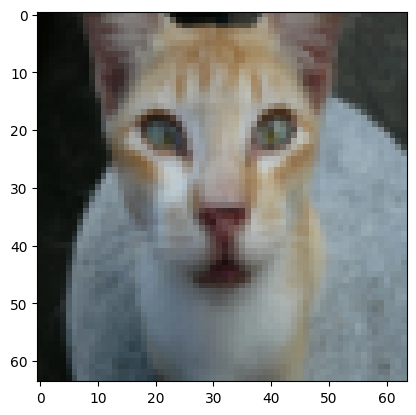

In [28]:
# Example of a picture
index = 11
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [0]


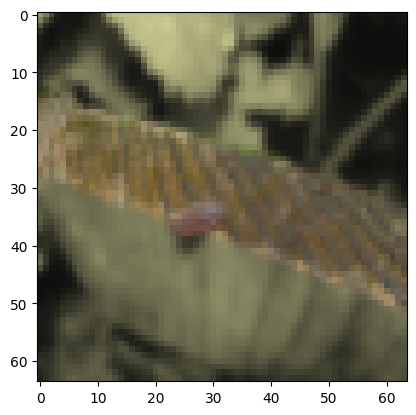

In [30]:
# Example of a picture
index = 12
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

label:  [1]


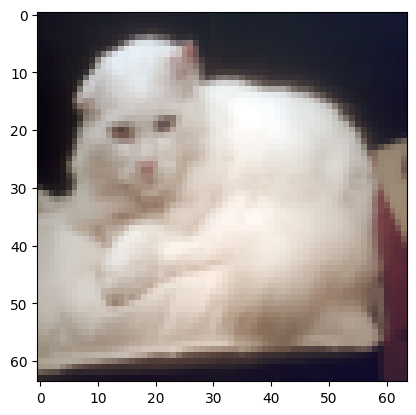

In [32]:
# Example of a picture
index = 13
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 2:** What percentage of the pictures in `train set` contain cats?

In [33]:
# your code here
# Calculate the number of training examples
m_train = train_set_y.shape[1]

# Count the number of cat images
num_cats = np.sum(train_set_y)

# Calculate the percentage of cat images
percentage_cats = (num_cats / m_train) * 100

print(f"Percentage of pictures in the training set that contain cats: {percentage_cats:.2f}%")



Percentage of pictures in the training set that contain cats: 34.45%


## Data Pre-processing

### Brief Theory: Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### Simple Numerical Example

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

In [7]:
red_channel_new = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
print(red_channel_new.shape)
print(red_channel_new)
green_channel_new = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]])
print(green_channel_new.shape)
print(green_channel_new)
blue_channel_new = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])
print(blue_channel_new.shape)
print(blue_channel_new)



(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


In [8]:
airplane_image_new = np.array([red_channel_new, green_channel_new, blue_channel_new])  # 3d array: Tensor
print(airplane_image_new.shape)
print(airplane_image_new)

(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 1: Numerical representation of each channel

In [9]:
airplane_flatten_new = airplane_image_new.flatten()   # 1d array: Vector
print(airplane_flatten_new.shape)
print(airplane_flatten_new)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


In [11]:
red_channel = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
green_channel = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]])
blue_channel = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])

print("Red Channel")
print(red_channel.shape)
print(red_channel)

print("Green Channel")
print(green_channel.shape)
print(green_channel)

print("Bue Channel")
print(blue_channel.shape)
print(blue_channel)



Red Channel
(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
Green Channel
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
Bue Channel
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


#### Step 2: Putting the channels together in the form of a tensor

In [12]:
print("channel, height, width")
airplane_image = np.array([red_channel, green_channel, blue_channel])  # 3d array: Tensor
print(airplane_image.shape)
print(airplane_image)

channel, height, width
(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 3: Flatten the tensor into a vector

In [13]:
airplane_flatten = airplane_image.flatten()   # 1d array: Vector
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Take one sample form train set again and check the shape of it. Try to interpret the numbers in the `shape`.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.

In [22]:
sample_index = 25
sample_image = train_set_x_orig[25]
print("Shape of sample image: ",sample_image.shape)

Shape of sample image:  (64, 64, 3)


### Exercise 4: Fallaten the this sample image? what is the size of the flattened image? why this number?

In [64]:
sample_flattened_image = sample_image.flatten();
print("Sample image size: ",sample_flattened_image.size)

Sample image size:  12288


### Data Preprocessing: Flattening the entrie Train and Test Datasets

In [20]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print("Train set shape: ",train_flat.shape)

test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print("Test set shape: ",test_flat.shape)

train_label = train_set_y[0]
print("Train label shape: ",train_label.shape)

test_label = test_set_y[0]
print("Test label shape: ",test_label.shape)



Train set shape:  (209, 12288)
Test set shape:  (50, 12288)
Train label shape:  (209,)
Test label shape:  (50,)


**Important Notes:**
- We have 209 samples in the train set, and
- 50 samples in the test set.
- each sample has 64x64x3=12288 `features`. So each pixel can be considered as one feature.
- remember that we had `4` features in `IRIS` dataset and now we have more than `10,000` features.

## Implementing Logistic Regression

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)



```
# This is formatted as code
```

### **Exercise 5:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

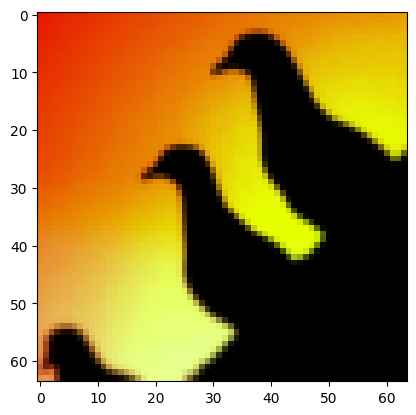

Original label: 0 (Class: b'non-cat')
Predicted label: 0 (Class: b'non-cat')


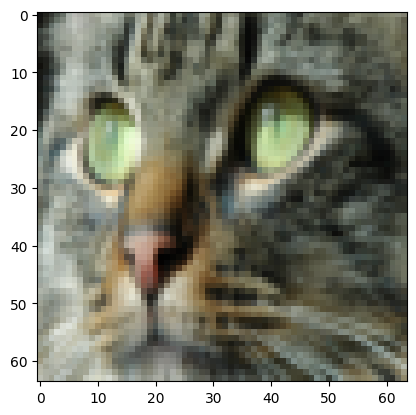

Original label: 1 (Class: b'cat')
Predicted label: 1 (Class: b'cat')


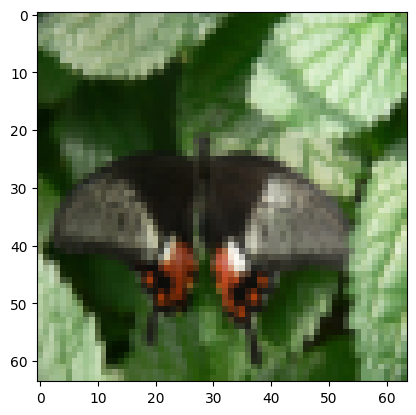

Original label: 0 (Class: b'non-cat')
Predicted label: 0 (Class: b'non-cat')


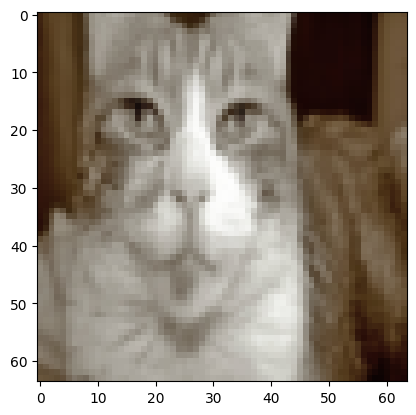

Original label: 1 (Class: b'cat')
Predicted label: 0 (Class: b'non-cat')


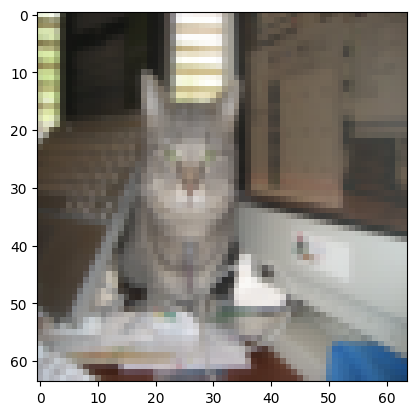

Original label: 1 (Class: b'cat')
Predicted label: 1 (Class: b'cat')


In [39]:
import random

def predict(index, model):
    """
    Displays an image, its original label, and its predicted label.
    Arguments:
    - index: Index of the image to evaluate.
    - model: A function that accepts input and returns predicted labels.
    """
    # Display the image
    plt.imshow(test_set_x_orig[index])
    plt.show()

    # Original label
    original_label = test_set_y[0, index]
    print(f"Original label: {original_label} (Class: {classes[original_label]})")

    # Preprocess the image (normalize and reshape if necessary)
    image = test_set_x_orig[index].reshape(-1).reshape(1, -1) / 255.0

    # Predicted label
    predicted_label = model(image)
    print(f"Predicted label: {predicted_label} (Class: {classes[int(predicted_label)]})")

# Mock model for demonstration
def mock_model(image):
    # Replace this with your actual model prediction logic
    return random.choice([0, 1])  # Randomly guessing 0 or 1 for demonstration

# Test the function with a random index
for _ in range(5):  # Repeat multiple times
    index = random.randint(0, test_set_x_orig.shape[0] - 1)
    predict(index, mock_model)


### **Exercise 6:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

### **Exercise 7:** Report the overall accuracy of your classifier.

In [52]:
#you code here
def calculate_accuracy(model):
    """
    Calculates the overall accuracy of the classifier on the test set.
    Arguments:
    - model: A function that accepts input and returns predicted labels.

    Returns:
    - accuracy: The overall accuracy of the classifier as a percentage.
    """
    # Preprocess the test set (normalize and reshape)
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.0

    # Make predictions
    predictions = model(test_set_x_flatten)

    # Calculate the number of correct predictions
    correct_predictions = np.sum(predictions == test_set_y)

    # Calculate accuracy
    accuracy = (correct_predictions / test_set_y.shape[1]) * 100
    return accuracy

# Mock model for demonstration
def mock_model(inputs):
    # Replace this with your actual model prediction logic
    return np.random.choice([0, 1], size=inputs.shape[1])  # Randomly guessing

# Calculate accuracy
accuracy = calculate_accuracy(mock_model)
print(f"Overall accuracy of the classifier: {accuracy:.2f}%")


Overall accuracy of the classifier: 62.00%


## MNIST dataset (Optional)- Do exercise 8-10 if you have extra time to practise

In [55]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
x_train.shape

(60000, 28, 28)

Label:  0
Image Shape:  (28, 28)


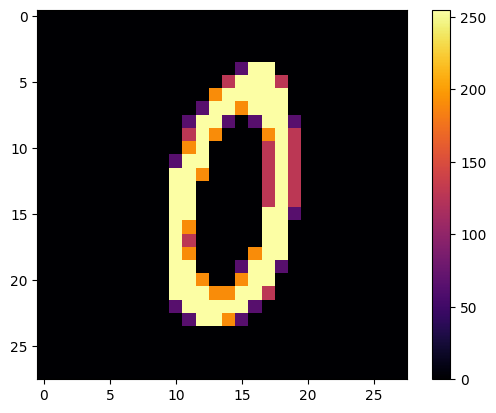

In [77]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='inferno')
plt.colorbar()

### **Excercise 8:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

### Hint: check the number of channels in the two types of images.

your answer here:

### **Exercise 9:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [67]:
## your code here
index = 11
sample_image = x_train[index]
print("Shape of sample image: ",sample_image.shape)
sample_flattened_image = sample_image.flatten();
print("Sample image size: ",sample_flattened_image.size)

Shape of sample image:  (28, 28)
Sample image size:  784


### **Excercise 10:** Flatten the Entire Train and Test Datasets and implement
a logistic regression model on MNIST dataset. What is the accuracy of your model?

In [78]:
##your code here
train_flat = x_train.reshape(x_train.shape[0], -1)
print("Train set shape: ",train_flat.shape)

Train set shape:  (60000, 784)


**Some food for thought:** What would the architecture of my model be if I used more than one neuron to predict the label?